# Unüberwachtes maschinelles Lernen
Unüberwachtes maschinelles Lernen ist eine Technik zur Konfiguration (Lernen) von Parametern eines Rechenmodells, die auf keiner Annotation basiert, sondern auf zusätzlichen Informationen wie der Anzahl der zu unterscheidenden Kategorien. Viele Algorithmen in dieser Kategorie führen Daten-_Clustering_ durch.

Siehe auch
* [Unüberwachtes Lernen (Wikipedia)](https://en.wikipedia.org/wiki/Unsupervised_learning)
* [Clustering-Algorithmen von scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

Unser Ausgangspunkt für die Demonstration von überwachtem maschinellem Lernen ist ein Paar von Messungen in einer bimodalen Verteilung. Im folgenden Datensatz sind Objekte mit einer größeren Fläche typischerweise auch länglicher.

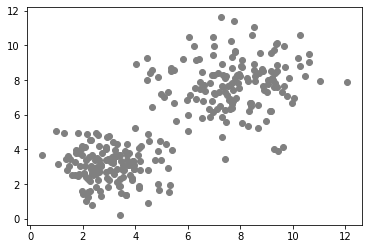

In [2]:
data = generate_biomodal_2d_data()

plt.scatter(data[:, 0], data[:, 1], c='grey')

Bei unüberwachten maschinellen Lernalgorithmen müssen wir dem Algorithmus zusätzliche Informationen bereitstellen, damit er die Datenpunkte sinnvoll in Regionen trennen (_clustern_) kann. Welche Informationen wir bereitstellen, hängt vom Algorithmus und von der Verteilung der Daten ab. Typischerweise wählen wir den Algorithmus abhängig von den Daten aus. Im obigen Beispiel können wir deutlich zwei Cluster sehen, es handelt sich um eine [bimodale Verteilung](https://en.wikipedia.org/wiki/Multimodal_distribution). In diesem Fall können wir die Anzahl der zu unterscheidenden Klassen angeben:

In [3]:
number_of_classes = 2

## Initialisierung des k-Means-Clusterings
[k-Means-Clustering](https://en.wikipedia.org/wiki/K-means_clustering) ist ein Algorithmus, der Datenpunkte in `k` Cluster gruppiert, sodass alle Datenpunkte dem nächstgelegenen Clusterzentrum zugeordnet werden.

Clustering-Algorithmen in scikit-learn haben typischerweise eine `fit()`-Funktion, die einen `data`-Satz wie oben gegeben verarbeitet.

In [4]:
classifier = KMeans(n_clusters=number_of_classes)
classifier.fit(data)

KMeans(n_clusters=2)

## Vorhersage
Nachdem das Modell trainiert (oder _gefittet_) wurde, können wir es auf unsere Daten anwenden, um eine Vorhersage zu erhalten, zu welchem Cluster die Datenpunkte gehören. Die Indizierung der Cluster beginnt bei 0. Wenn wir also gebeten wurden, zwei Cluster zu unterscheiden, sind die Cluster-Indizes 0 und 1:

In [5]:
prediction = classifier.predict(data)
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], d

Wir können dann alle vorhergesagten Klassen farbig visualisieren.

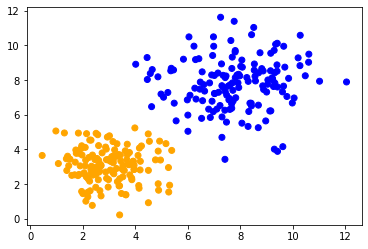

In [6]:
colors = ['orange', 'blue']
predicted_colors = [colors[i] for i in prediction]

plt.scatter(data[:, 0], data[:, 1], c=predicted_colors)

## Übung
Trainieren Sie ein [Gaussian Mixture Model]() und visualisieren Sie dessen Vorhersage.

In [7]:
from sklearn.mixture import GaussianMixture

classifier = GaussianMixture(n_components=2)